# Notebook: Results

This notebook handles the analysis of the main results for both reaoning models and reasoning strategies. Main results in the paper will be shown in tables (which are created here) but here we also plot the confidence intervals plot for reasoning frameworks

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from collections import defaultdict

from plots import *

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
import matplotlib.lines as mlines
import seaborn as sns

VERBOSE = False

## 1. Reasoning Models

### 1.1 Tables

In [2]:
...

Ellipsis

## 2. Reasoning strategies

In [3]:
# Models we've run experiments on
models = [
    "gpt-4.1-nano",
    "gpt-5-nano", 
    "qwen3-32b", 
    "llama-4-scout-17b-16e-instruct",     
]

# Experiments we've set up
"""
    - simple: Standard evaluation without any special prompting strategies
    - repeats: Same as simple, but the experiment is repeated multiple times
"""
experiments = [
    "simple",
    "repeats"
]

# Benchmarks we've run experiments on
benchmarks = [
        "game24",
        "hle",
        "hotpotqa",
        "humaneval",
        "matharena",
        "scibench",
        "sonnetwriting"
    ]

# Reasoning strategies we've employed
strategies = [
    "io",
    "cot",
    "cot_sc",
    "foa",
    "tot_bfs",
    "tot_dfs",
    "got",
    "react",
    "reflection",
    "rap",
    "mcts"
]

### 2.1 Tables

In [4]:
...

Ellipsis

### 2.2 Confidence Intervals (Main)

In [5]:
# Chosen model for plotting
model = "gpt-4.1-nano"
experiment = "repeats"
df = pd.read_parquet(f"../data/strategies/{experiment}/{model}/latest.parquet")

df["Accuracy"] = df["scores"].apply(lambda x: np.mean(x))

# Custom ordering of methods for plotting
custom_order = ["io", "cot", "cot_sc", "foa" ,"tot_bfs", "tot_dfs", "react", "got"]
df["Method"] = pd.Categorical(
    df["Method"],
    categories=custom_order,
    ordered=True
)
df.sort_values("Method", inplace=True)

if VERBOSE:
    display(df.head(2))

#### 2.2.1 Main Paper

/Users/nearchospotamitis/CLAN/ReasonBench/notebooks/plots.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([benchmark_col, method_col])[value_col]


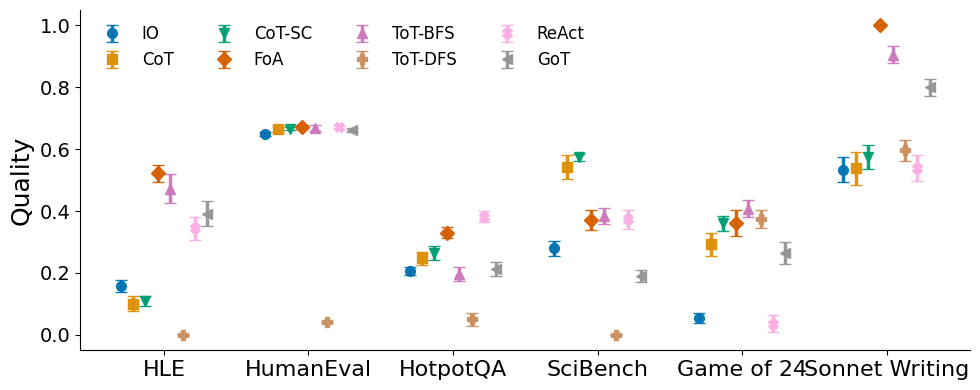

In [6]:

fig, ax, summary = plot_errorbar(df.copy())
plt.show()


#### Appendix - Alternative A: Errobars

/Users/nearchospotamitis/CLAN/ReasonBench/notebooks/plots.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([benchmark_col, method_col])[value_col]


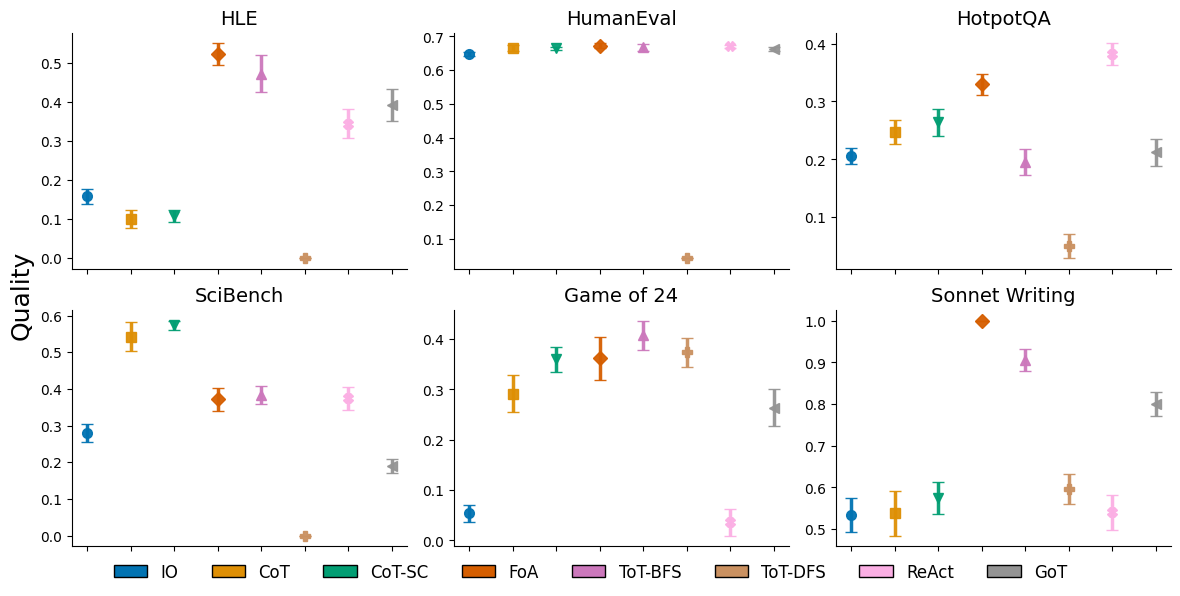

In [7]:
fig, axes, summary = plot_panel_errorbar(df.copy())
plt.show()

#### Appendix - Alternative B: Boxplot --> The one we chose

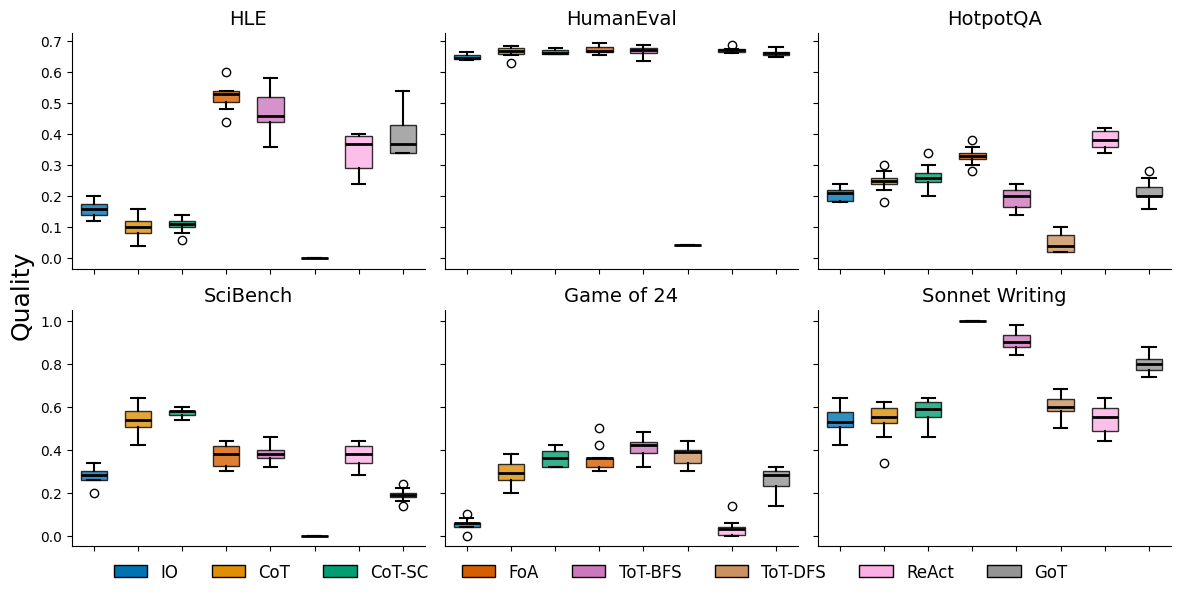

In [8]:
fig, axes = plot_panel_boxplot(df.copy())
plt.show()

#### Appendix - Alternative C: Violinplot

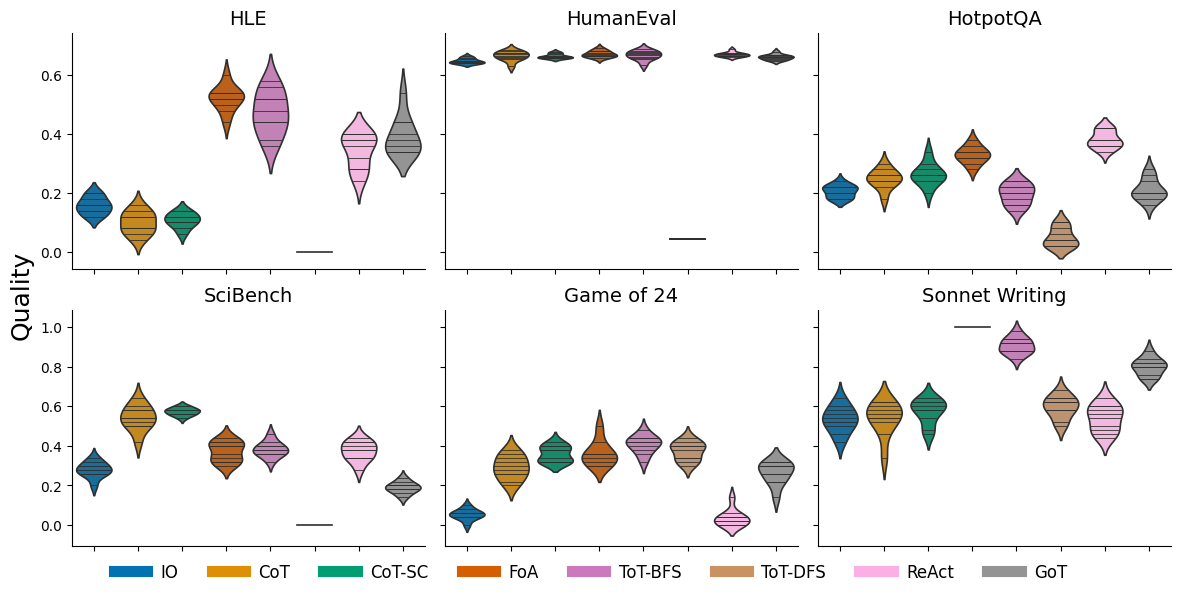

In [9]:
fig, axes = plot_panel_violin(df.copy())
plt.show()

### 2.3 Family comparison

In [10]:
# Chosen model for plotting
models =[ "gpt-4.1-nano", "gpt-4.1-mini" ]
dfs = []
for model in models:
    experiment = "repeats"
    df = pd.read_parquet(f"../data/strategies/{experiment}/{model}/latest.parquet")

    df["Accuracy"] = df["scores"].apply(lambda x: np.mean(x))

    # Custom ordering of methods for plotting
    custom_order = ["io", "cot", "cot_sc", "foa" ,"tot_bfs", "tot_dfs", "react", "got"]
    df["Method"] = pd.Categorical(
        df["Method"],
        categories=custom_order,
        ordered=True
    )
    df.sort_values("Method", inplace=True)
    dfs.append(df)

#### Alternative A: Errorbars

/Users/nearchospotamitis/CLAN/ReasonBench/notebooks/plots.py:543: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([benchmark_col, method_col, "_dataset"])[value_col]


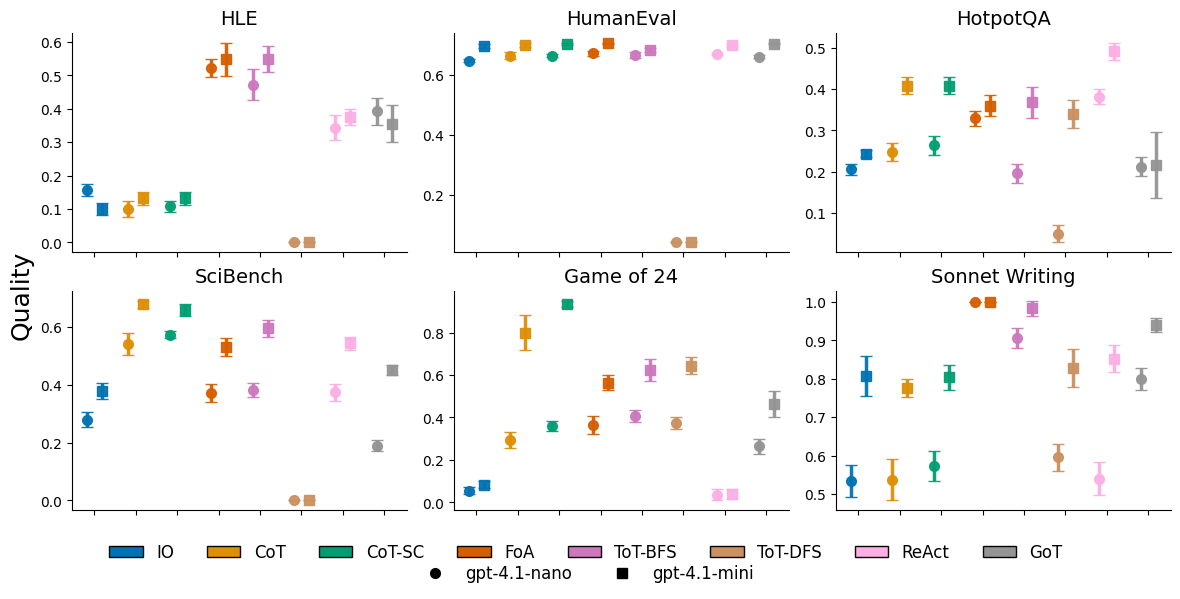

In [11]:
fig, axes, summary = plot_panel_dual_errorbar(dfs[0].copy(), dfs[1].copy(), label_a="gpt-4.1-nano", label_b="gpt-4.1-mini")
plt.show()

#### Alternative B: Boxplot

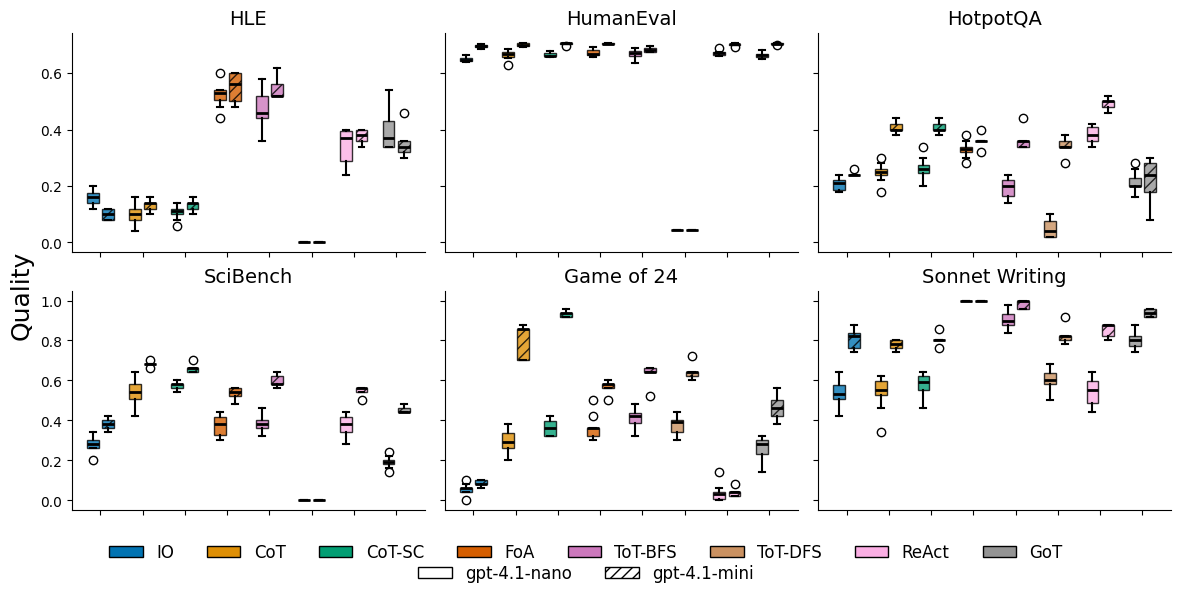

In [12]:
fig, axes = plot_panel_dual_boxplot(dfs[0].copy(), dfs[1].copy(), label_a="gpt-4.1-nano", label_b="gpt-4.1-mini")
plt.show()

#### Alternative C: Violinplot

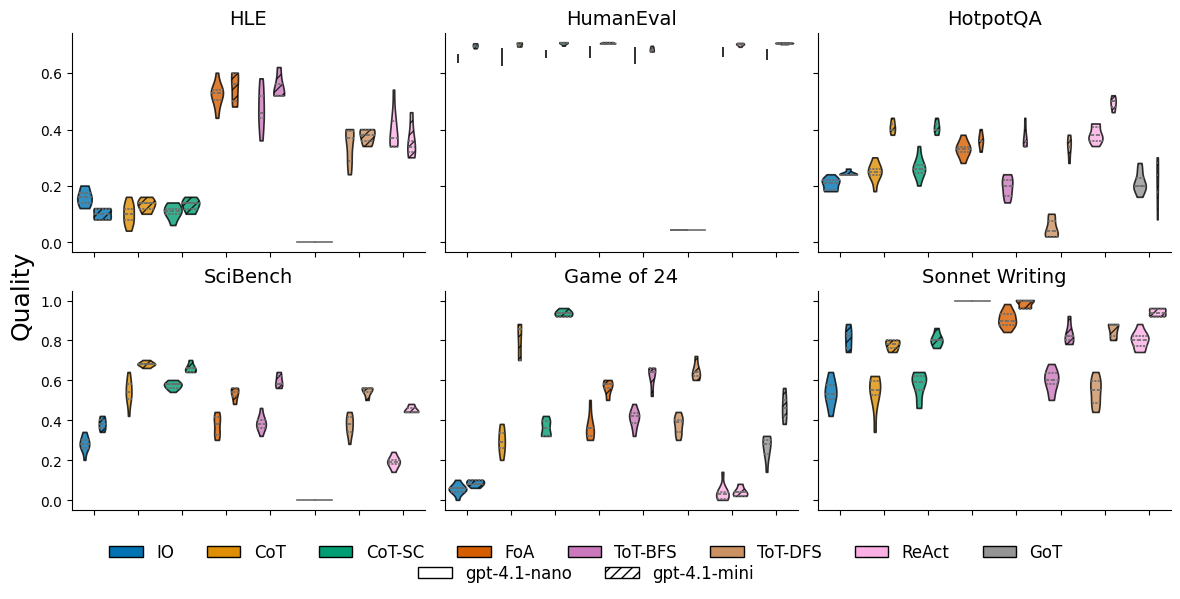

In [13]:
fig, axes = plot_panel_dual_violin(dfs[0].copy(), dfs[1].copy(), label_a="gpt-4.1-nano", label_b="gpt-4.1-mini")
plt.show()

#### Alternative D: Violinplot Split

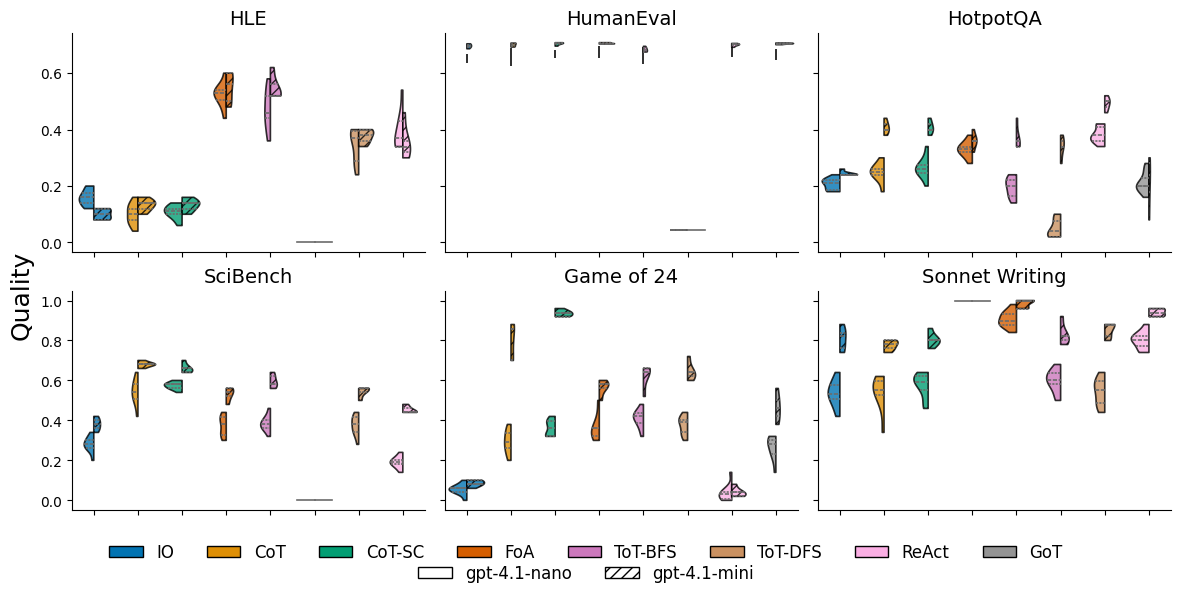

In [14]:
fig, axes = plot_panel_dual_violin_split(dfs[0].copy(), dfs[1].copy(), label_a="gpt-4.1-nano", label_b="gpt-4.1-mini")
plt.show()